## Zadanie XOR – należy skonstruować sieć neuronową realizującą bramkę XOR

| x1 | x2 | y = x1 XOR x2 |
|:--:|:--:|:-------------:|
| -1 | -1 |       0       |
| -1 |  1 |       1       |
|  1 | -1 |       1       |
|  1 |  1 |       0       |

In [2]:
import numpy as np


In [3]:
class Network:
    def __init__(self, eta, layers, max_i=10000, max_error=0.00001):
        self._eta = eta
        self._layers = layers
        self._w = []
        self._y = []
        self._delta = []
        self.max_i = max_i
        self.max_error = max_error

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def _create_weights(self, x_num):
        for i, layer_i in enumerate(self._layers):
            if i == 0:
                self._w.append(
                    np.random.uniform(-1, 1, size=(layer_i, x_num + 1)))
            else:
                self._w.append(
                    np.random.uniform(
                        -1, 1, size=(layer_i, self._w[i - 1].shape[0] + 1)
                    )
                )
            self._y.append(np.zeros(layer_i))
            self._delta.append(np.zeros(layer_i))

    def _forward_progation(self, x):
        for i in range(len(self._layers)):
            if i == 0:
                self._y[i] = np.dot(self._w[i], np.append(np.array(1), x))
            else:
                self._y[i] = np.dot(self._w[i], np.append(
                    np.array(1), self._y[i - 1]))
            self._y[i] = self.sigmoid(self._y[i])

    def _backward_propagation(self, expected_output):
        for i in range(len(self._y) - 1, -1, -1):
            if i == len(self._y) - 1:
                error = expected_output - self._y[i]
                self._delta[i] = error * self.sigmoid(self._y[i], True)
            else:
                self._delta[i] = np.dot(
                    self._w[i+1][:, 1:].T, self._delta[i+1]) * self.sigmoid(self._y[i], True)
        return error

    def _update(self, x):
        for i in range(len(self._layers)):
            for j in range(len(self._delta[i])):
                if i == 0:
                    self._w[i][j] += np.append([1], x) * \
                        self._delta[i][j] * self._eta
                else:
                    self._w[i][j] += (
                        np.append([1], self._y[i - 1]) *
                        self._delta[i][j] * self._eta
                    )

    def fit(self, x, y, verbose=False):
        self._create_weights(np.shape(x)[1])
        data = list(zip(x, y))
        for epoch in range(self.max_i):
            np.random.shuffle(data)
            E = 0
            for x_i, y_i in data:
                self._forward_progation(x_i)
                b = self._backward_propagation(y_i)
                b = b**2
                E += 0.5 * b.sum()
                self._update(x_i)
            if E < self.max_error:
                break
            if verbose:
                print(f"Epoka: {epoch+1} z {self.max_i}, blad: {E}")
        return E

    def predict(self, x):
        y_pred = []
        for i, layer_i in enumerate(self._layers):
            y_pred.append(np.zeros(layer_i))
        for i in range(len(self._layers)):
            if i == 0:
                y_pred[i] = np.dot(self._w[i], np.append(np.array(1), x))
            else:
                y_pred[i] = np.dot(self._w[i], np.append(
                    np.array(1), y_pred[i - 1]))
            y_pred[i] = self.sigmoid(y_pred[i])
        return y_pred[-1]


In [4]:
x = [(-1, -1), (-1, 1), (1, -1), (1, 1)]
y = (0, 1, 1, 0)


In [5]:
network = Network(0.3, (2, 1), 10000, 0.001)
network.fit(x, y)


0.0009998860254590031

In [6]:
for row, y_true in zip(x, y):
    y_pred = network.predict(row)
    print(
        f"x1: {row[0]}, x2: {row[1]} ----  y_pred: {y_pred[0]:.2f} ----- y_true: {y_true}"
    )


x1: -1, x2: -1 ----  y_pred: 0.02 ----- y_true: 0
x1: -1, x2: 1 ----  y_pred: 0.97 ----- y_true: 1
x1: 1, x2: -1 ----  y_pred: 0.98 ----- y_true: 1
x1: 1, x2: 1 ----  y_pred: 0.02 ----- y_true: 0


In [7]:
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = np.zeros((100, 100))


In [8]:
for i, _ in enumerate(X1):
    for j, _ in enumerate(X2):
        Y[i][j] = network.predict([X1[i][j], X2[i][j]])


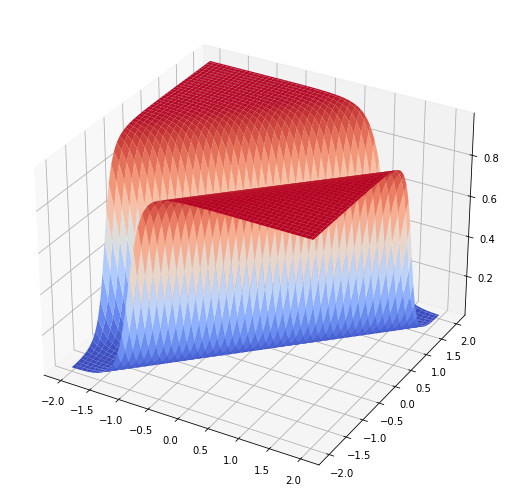

In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm


fig = plt.figure(figsize=(14, 9))
ax = plt.axes(projection="3d")

ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm)


plt.show()
